In [ ]:
import numpy as np

def majority_heads_biased(n, p=0.51):
  successes = 0
  for i in range(n):
    # outcome of the coin toss
    if np.random.random() > 1 - p:
      successes += 1
  return successes > 500, successes

print(majority_heads_biased(1000))

(False, 488)


In [ ]:
from scipy.stats import binom, norm
import math

def majority_heads_binom(n, p=0.51):
  majority =  math.ceil(n/2)
  return sum(binom.pmf(k, n, p) for k in range(majority, n + 1))

print(majority_heads_binom(1000))
print(majority_heads_binom(10000))

0.7467502275563255
0.9777976478701229


In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42, probability=True))
    ]
)

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.912

24/01/2025

In [ ]:
voting_clf.estimators

[('lr', LogisticRegression(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)),
 ('svc', SVC(random_state=42))]

In [ ]:
voting_clf.estimators_

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(random_state=42)]

In [ ]:
voting_clf.get_params()

{'estimators': [('lr', LogisticRegression(random_state=42)),
  ('rf', RandomForestClassifier(random_state=42)),
  ('svc', SVC(random_state=42))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(random_state=42),
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'deprecated',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf_

In [ ]:
voting_clf.named_estimators_

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(random_state=42)}

In [ ]:
voting_clf.named_estimators

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(random_state=42)}

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, clf.score(X_test, y_test))

lr 0.864
rf 0.896
svc 0.896


In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[estimator.predict(X_test[:1]) for estimator in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [ ]:
X_test[0]

array([0.50169252, 0.21717211])

In [ ]:
X_test[:1]

array([[0.50169252, 0.21717211]])

In [ ]:
voting_clf.voting = 'soft'
voting_clf.score(X_test, y_test)

0.92

# Bagging and Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

# bootstrap=True is bagging, bootstrap=False is pasting

0.928

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.848

In [ ]:
bag_clf.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'max_features': 1.0,
 'max_samples': 100,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# OOB evaluation -> Out Of Bag evaluation

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_test, y_test)

0.912

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes=16, max_features='sqrt'),
                            n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.912

In [ ]:
bag_clf.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': 16,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=16),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_leaf_nodes=16)
ext_clf.fit(X_train, y_train)
ext_clf.score(X_test, y_test)

0.92

in this case, splitter='random'

In [ ]:
# random subspaces -> Random Features
# random subpatches -> Random Features + Random Instances

# Feature Importances

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
  print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


In [ ]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

# Boosting

## AdaBoost

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             learning_rate=0.5)

ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.896

## GradientBoosting


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * (X[:, 0] ** 2) + 0.05 + np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)
gbrt.score(X, y)

0.31602774132257005

In [ ]:
gbrt_best = GradientBoostingRegressor(max_depth=2, learning_rate=0.05, n_estimators=500,
                                      n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)
gbrt_best.score(X, y)

0.37699253449336967

In [ ]:
gbrt_best.n_estimators_

57

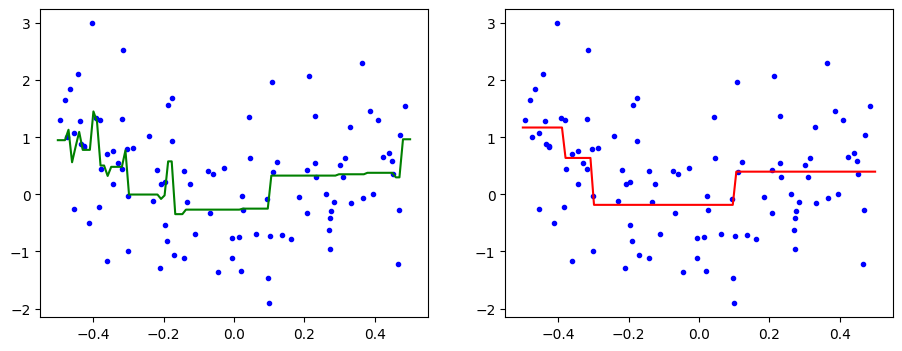

In [ ]:
from matplotlib import pyplot as plt
X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, 'b.')
plt.plot(X_new, gbrt_best.predict(X_new), 'g-', label='boosted');

plt.subplot(122)
plt.plot(X, y, 'b.')
plt.plot(X_new, tree_reg1.predict(X_new), 'r-', label='Tree');

## eXtraGradientBoosting

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X, y)
xgb_reg.score(X, y)

0.999271757354815

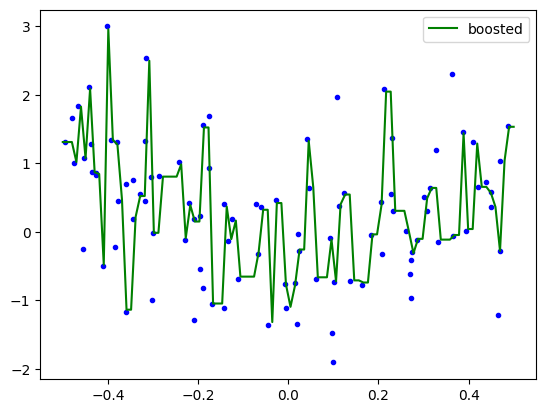

In [ ]:
plt.plot(X, y, 'b.')
plt.plot(X_new, xgb_reg.predict(X_new), 'g-', label='boosted')
plt.legend();

## CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

catboost = CatBoostRegressor(iterations=20, learning_rate=1, depth=2)
catboost.fit(X, y)
catboost.score(X, y)

0:	learn: 0.9181215	total: 46.4ms	remaining: 881ms
1:	learn: 0.8883178	total: 47.2ms	remaining: 425ms
2:	learn: 0.8818801	total: 47.6ms	remaining: 270ms
3:	learn: 0.8682438	total: 48ms	remaining: 192ms
4:	learn: 0.8607117	total: 48.3ms	remaining: 145ms
5:	learn: 0.8541511	total: 48.7ms	remaining: 114ms
6:	learn: 0.8431250	total: 49.1ms	remaining: 91.1ms
7:	learn: 0.8353401	total: 49.4ms	remaining: 74.1ms
8:	learn: 0.8140225	total: 49.8ms	remaining: 60.9ms
9:	learn: 0.8086981	total: 50.1ms	remaining: 50.1ms
10:	learn: 0.7911419	total: 50.5ms	remaining: 41.4ms
11:	learn: 0.7801985	total: 50.9ms	remaining: 33.9ms
12:	learn: 0.7495525	total: 51.2ms	remaining: 27.6ms
13:	learn: 0.7410625	total: 51.6ms	remaining: 22.1ms
14:	learn: 0.7355930	total: 51.9ms	remaining: 17.3ms
15:	learn: 0.7216209	total: 52.3ms	remaining: 13.1ms
16:	learn: 0.7184320	total: 52.6ms	remaining: 9.29ms
17:	learn: 0.7000765	total: 53ms	remaining: 5.89ms
18:	learn: 0.6848242	total: 53.3ms	remaining: 2.81ms
19:	learn: 0.

0.5256016764484621

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sehriyarmemmedli/mnist-dataset")

print("Path to dataset files:", path)

import pandas as pd
import numpy as np
df = pd.read_csv(path + '/mnist_data.csv')
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
X.shape, y.shape

100%|██████████| 15.2M/15.2M [00:00<00:00, 33.1MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sehriyarmemmedli/mnist-dataset/versions/2


((70000, 784), (70000,))

29/01/2025

# Stacking



In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

stack_clf = StackingClassifier(
    estimators=
    [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42, probability=True))
    ],
    final_estimator=RandomForestClassifier(random_state=43)
)

stack_clf.fit(X_train, y_train)
stack_clf.score(X_test, y_test)


0.928

# Homework Questions

In [ ]:
# Math questions:
# Calculate the Maxtrix multiplication of Given Matrices
# Given matrices A and B:
# A = | 2  4  1 |
#       | 3  5  6 |
#      | 4   3   1|


# B = | 1  3  2 |
#       | 4  2  5 |
#       | 1   4   5|



a = np.array([[2,4,1],
              [3,5,5],
              [4,3,1]])

b = np.array([[1,3,2],
              [4,2,5],
              [1,4,5]])

a @ b

array([[19, 18, 29],
       [28, 39, 56],
       [17, 22, 28]])

In [ ]:
# Multiply elements-wise matrixes
a * b

array([[ 2, 12,  2],
       [12, 10, 25],
       [ 4, 12,  5]])

most of them do not require writing

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 39.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [ ]:
import pandas as pd

In [ ]:
churn = pd.read_csv(path + '/Churn_Modelling.csv')

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# rownumber, customerid, surname is not needed

In [ ]:
def clean(data):
  return data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
clean(churn_copy)

In [ ]:
churn_copy = churn.copy()

In [ ]:
X = churn_copy.drop('Exited', axis=1)
y = churn_copy['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.pipeline import make_pipeline

cat_pipeline = make_pipeline(
    OneHotEncoder()
)

ct = ColumnTransformer(
    [
        ('cat', OneHotEncoder(), ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])
        # ('cat', cat_pipeline, ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])
    ]
)

X_train_transformed = pd.DataFrame(ct.fit_transform(X_train), columns=ct.get_feature_names_out())
X_test_transformed = pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names_out())


rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train_transformed, y_train)
rnd_clf.score(X_test_transformed, y_test)

0.8195

27/01/2025